In [1]:
import pandas as pd
df=pd.read_csv("diabetes_dataset.csv")
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Picking Features

In [2]:
x=df.drop(['Outcome'], axis=1)

# x=df.loc[:,['Glucose', 'BMI', 'Age']].to_numpy()
x[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [3]:
# Target

y=df.Outcome
y[:5]

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [5]:
model = DecisionTreeClassifier(max_leaf_nodes=6, max_depth=3, criterion="entropy")
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)

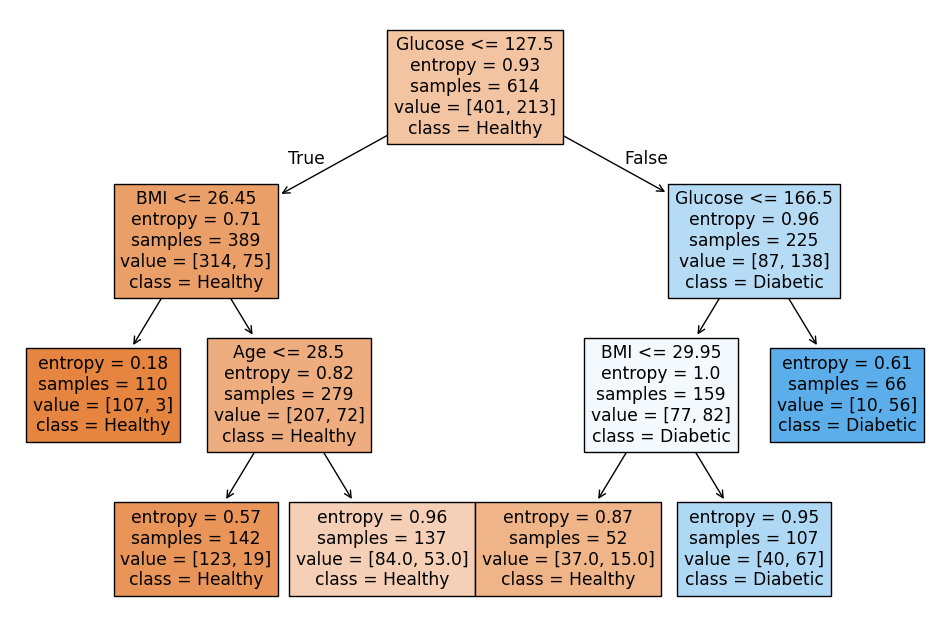

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plot_tree(model,
          feature_names=df.columns.values,
          filled=True,
          class_names=['Healthy','Diabetic'],
          precision=2)
plt.show()

In [7]:
from sklearn import metrics
print(f'Accuracy: ', metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy:  79.87012987012987


In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



In [9]:
feature_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
                 "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

labels = {1: "Diabetes", 0: "Healthy"}

In [10]:
input_data = pd.DataFrame([[6, 148, 72, 35, 0, 33.6, 0.627, 50]], columns=feature_names)

labels[model.predict(input_data)[0]]

'Diabetes'

In [11]:
input_data = pd.DataFrame([[1,85,66,29,0,26.6,0.351,31]], columns=feature_names)

labels[model.predict(input_data)[0]]

'Healthy'